# Goeduhub Technologies - ML Training - Task 11
## Registration ID: GO_STP_939 
## Name: Manoj Kannan D
#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Decision Trees

## Predict Loan Eligibility for Dream Housing Finance company
Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

# Load Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Datasets/Loan_Predication.csv')
df = df.drop('Loan_ID',axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Exploring Dataset

In [3]:
# dimensions of the dataset
df.ndim

2

In [4]:
# shape of the dataset
df.shape

(614, 12)

In [5]:
# columns present in our dataset
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
# datatypes of the each column
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
# Print a concise summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [8]:
# provides statistical analysis only in numerrical columns
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
# check for null elements
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Handling Missing Values

In [10]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Credit_History','Loan_Amount_Term']

for feature in categorical_columns:
    df[feature].fillna(df[feature].value_counts().index[0],inplace=True)
    
for feature in numerical_columns:
    df[feature].fillna(df[feature].mean(),inplace=True)

In [11]:
# check for null elements
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Analyse Categorical Features

In [12]:
df.Gender.value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [13]:
df.Married.value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [14]:
df.Dependents.value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [15]:
df.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [16]:
df.Self_Employed.value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [17]:
df.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

# Data Visualization

In [18]:
def category_plot(var):
    fig = plt.figure(figsize=(14,5))
    fig.suptitle('Count of '+var ,fontsize=14)
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)
    ax1.pie(df[var].value_counts(), labels=df[var].unique(), autopct='%.0f%%', explode=[0.03]*df[var].nunique())
    ax2.bar(df[var].unique(),df[var].value_counts())

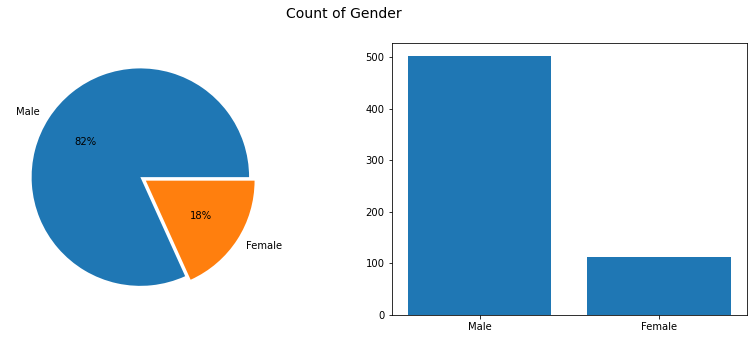

In [19]:
category_plot('Gender')

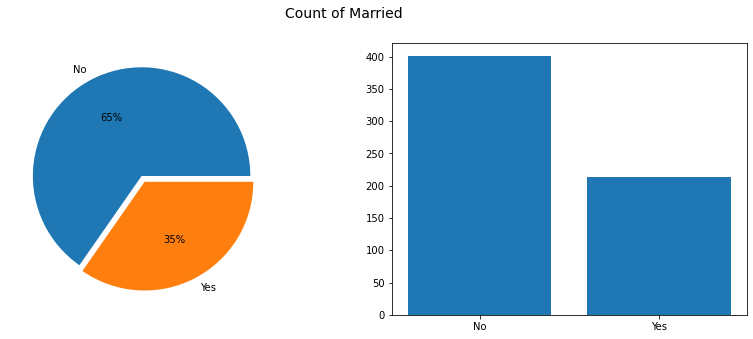

In [20]:
category_plot('Married')

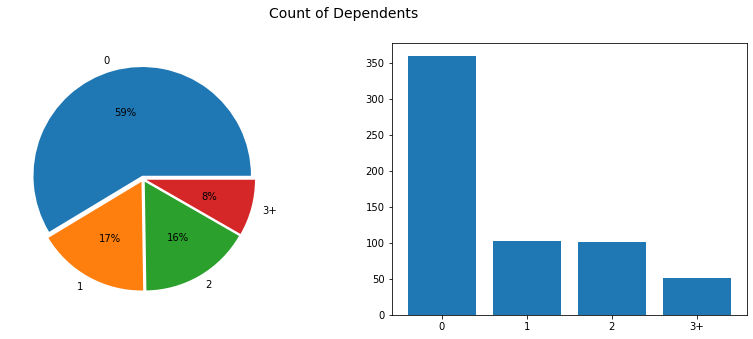

In [21]:
category_plot('Dependents')

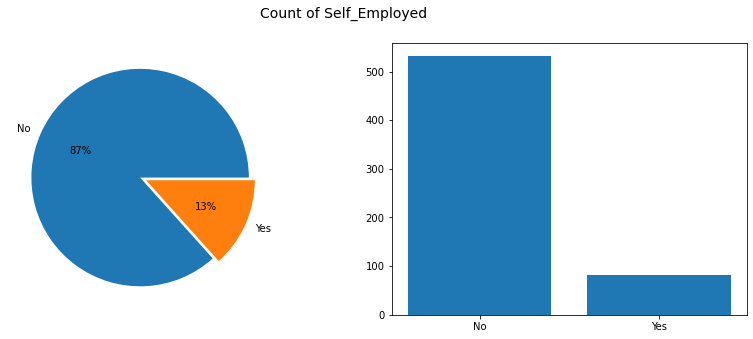

In [22]:
category_plot('Self_Employed')

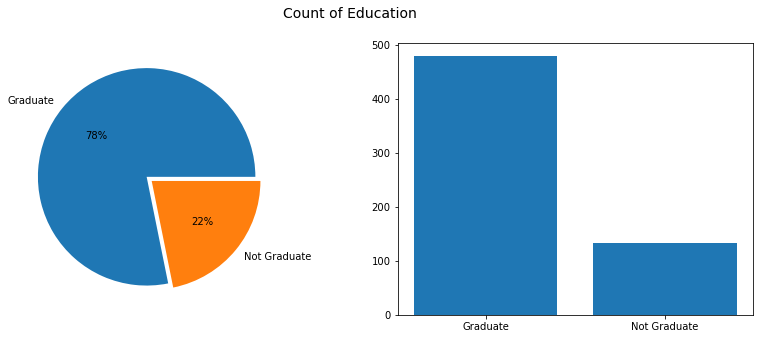

In [23]:
category_plot('Education')

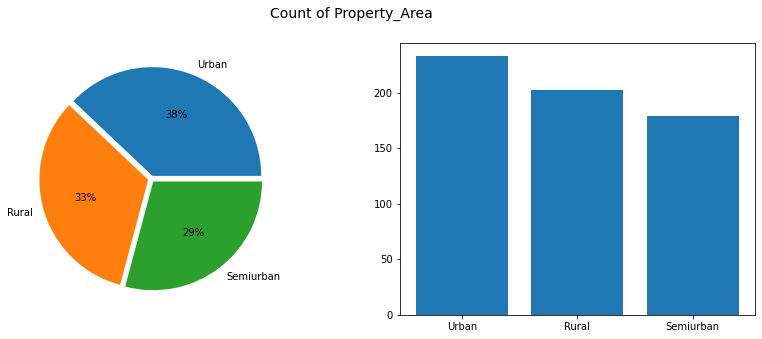

In [24]:
category_plot('Property_Area')

In [25]:
def numerical_plot(var):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.histplot(x=df[var], kde=True, bins=10)
    plt.subplot(1,2,2)
    sns.barplot(x=df['Loan_Status'], y=df[var])
    plt.suptitle(var,fontsize=14)

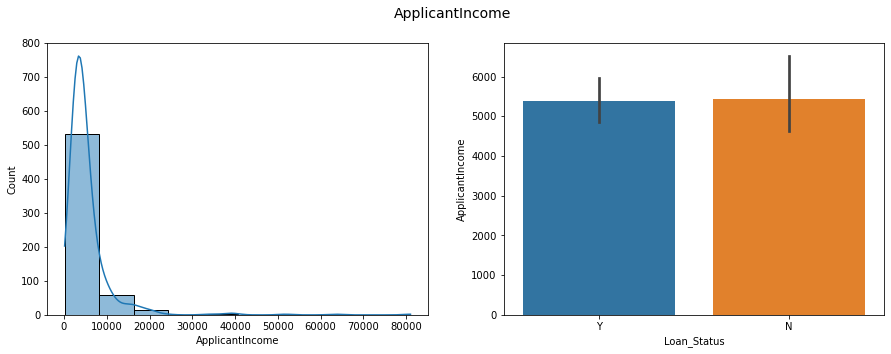

In [26]:
numerical_plot('ApplicantIncome')

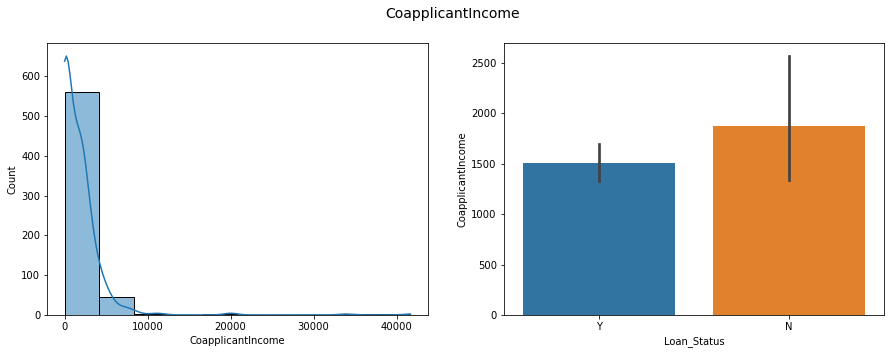

In [27]:
numerical_plot('CoapplicantIncome')

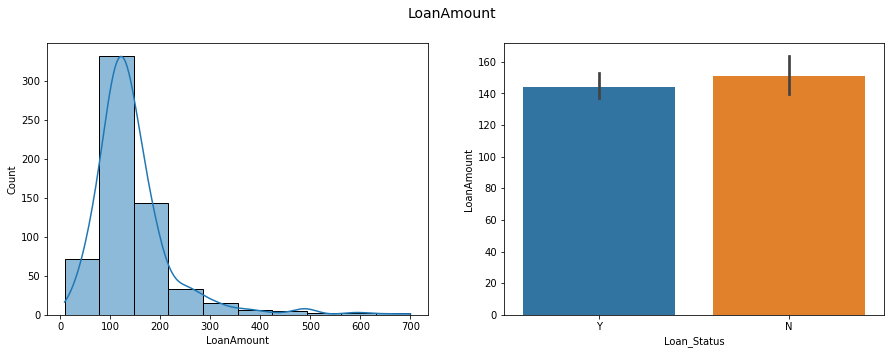

In [28]:
numerical_plot('LoanAmount')

## Pair Plot
**In seaborn library we have pairplot function which is very useful to scatter plot all the features at once instead of plotting them individually.** <br>

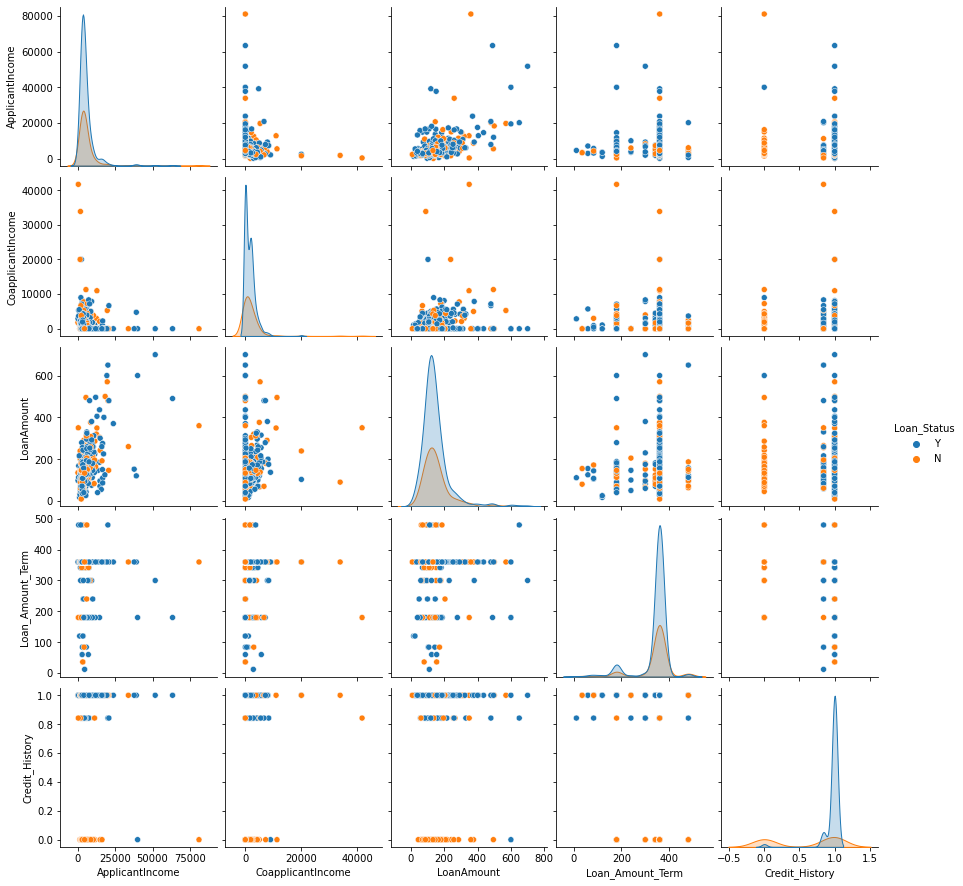

In [29]:
sns.pairplot(df,hue='Loan_Status')
plt.show()

## Correlation Between Variables

<AxesSubplot:>

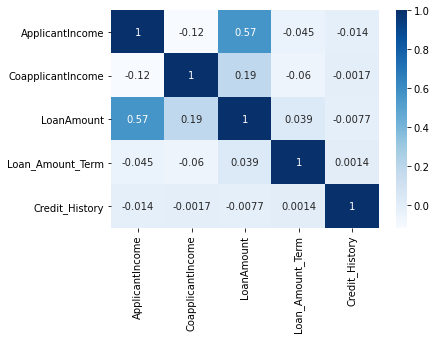

In [30]:
sns.heatmap(df.corr(), cmap='Blues', annot = True)

# ML Model
## Data PreProcessing

In [31]:
df_with_dummies = pd.get_dummies(df,drop_first=True)
df_with_dummies.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.000000,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.000000,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.000000,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,0,0,0,1,1


In [32]:
X = df_with_dummies.drop('Loan_Status_Y',axis=1)
y = df_with_dummies['Loan_Status_Y']

## Train Test Split

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85,random_state=7)
# random_state is set for reproduciblity of same results

In [34]:
print(X_train.shape)
print(X_test.shape)

(521, 14)
(93, 14)


## Decision Tree Classifier

In [35]:
from sklearn import tree

In [36]:
tree_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=)
tree_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [37]:
pred = tree_model.predict(X_test)
pred

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0], dtype=uint8)

## Accuracy

In [38]:
print('Training accuracy:',tree_model.score(X_train,y_train))
print('Testing accuracy:',tree_model.score(X_test,y_test))

Training accuracy: 0.9251439539347409
Testing accuracy: 0.7419354838709677


## Tree Visualization

In [39]:
tree_text_rep = tree.export_text(tree_model)
print(tree_text_rep)

|--- feature_4 <= 0.42
|   |--- feature_2 <= 547.50
|   |   |--- feature_0 <= 5351.00
|   |   |   |--- feature_0 <= 4316.50
|   |   |   |   |--- feature_1 <= 6623.00
|   |   |   |   |   |--- feature_2 <= 94.00
|   |   |   |   |   |   |--- feature_2 <= 85.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_2 >  85.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_2 >  94.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_1 >  6623.00
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  4316.50
|   |   |   |   |--- feature_2 <= 127.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_2 >  127.00
|   |   |   |   |   |--- feature_11 <= 0.50
|   |   |   |   |   |   |--- feature_0 <= 4934.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_0 >  4934.00
|   |   |   |   |   |   |   |--- feature_0 <= 5200.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   

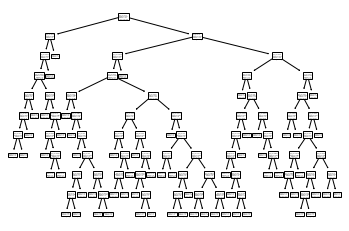

In [40]:
tree.plot_tree(tree_model)
plt.show()

# Confusion Matrix

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)
cm

array([[14, 17],
       [ 7, 55]], dtype=int64)

In [42]:
# Evaluation Metrics
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, pred))
print("Precision:",metrics.precision_score(y_test, pred))
print("Recall:",metrics.recall_score(y_test, pred))
print("F1 Score:",metrics.f1_score(y_test, pred))

Accuracy: 0.7419354838709677
Precision: 0.7638888888888888
Recall: 0.8870967741935484
F1 Score: 0.8208955223880596


In [43]:
# Classification report
print('Classification Report\n',metrics.classification_report(y_test, pred))

Classification Report
               precision    recall  f1-score   support

           0       0.67      0.45      0.54        31
           1       0.76      0.89      0.82        62

    accuracy                           0.74        93
   macro avg       0.72      0.67      0.68        93
weighted avg       0.73      0.74      0.73        93



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

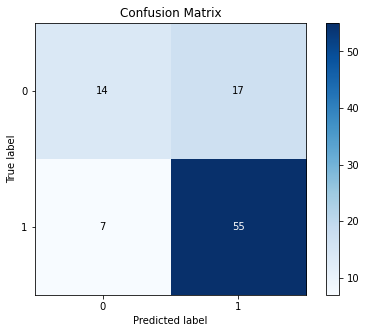

In [44]:
import scikitplot 
scikitplot.metrics.plot_confusion_matrix(y_test, pred, figsize=(7,5))

# ROC Curve

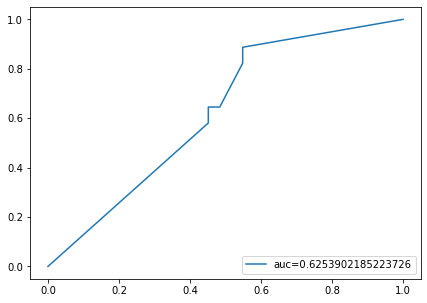

In [45]:
plt.figure(figsize=(7,5))
y_pred_proba = tree_model.predict_proba(X_test)[::,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
# (or) auc = metrics.auc(fpr,tpr)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

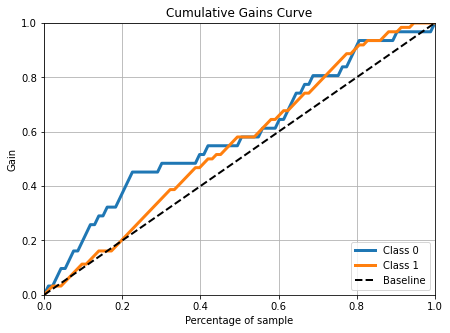

In [46]:
scikitplot.metrics.plot_cumulative_gain(y_test, tree_model.predict_proba(X_test) ,figsize=(7,5))
plt.show()